In [130]:
#!pip3 install pyqt5
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open matplotlib in interactive mode
%matplotlib qt5

In [131]:
# load the image
img = cv2.imread('assignment_image.jpg', 0)

In [132]:
img.shape

(960, 720)

In [133]:
# show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

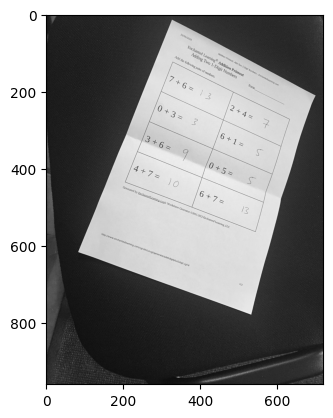

In [134]:
%matplotlib inline
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

In [135]:
# interactively get the corner points of the document
points_original = np.float32(
    [
    [326, 15],  # point A
    [83, 617],  # point B
    [531, 780],  # point C
    [698, 211]  # point D
    ])

pt_a = np.int32(points_original[0])
pt_b = np.int32(points_original[1])
pt_c = np.int32(points_original[2])
pt_d = np.int32(points_original[3])


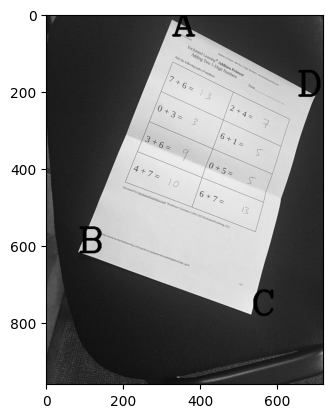

In [136]:
# create a copy of the image
img_with_text = img.copy()

# place the A B C D letters on the four
cv2.putText(img_with_text, 'A', (326, 55),
            cv2.FONT_HERSHEY_COMPLEX, 3, (0, 0, 0), 5)
cv2.putText(img_with_text, 'B', pt_b,
            cv2.FONT_HERSHEY_COMPLEX, 3, (0, 0, 0), 5)
cv2.putText(img_with_text, 'C', pt_c,
            cv2.FONT_HERSHEY_COMPLEX, 3, (0, 0, 0), 5)
cv2.putText(img_with_text, 'D', (650, 211),
            cv2.FONT_HERSHEY_COMPLEX, 3, (0, 0, 0), 5)

plt.imshow(cv2.cvtColor(img_with_text, cv2.COLOR_GRAY2RGB))

In [137]:
# calculate side lengths
# side AB
side_ab = np.sqrt(((pt_a[0] - pt_b[0]) ** 2) + ((pt_a[1] - pt_b[1]) ** 2))

# side BC
side_bc = np.sqrt(((pt_b[0] - pt_c[0]) ** 2) + ((pt_b[1] - pt_c[1]) ** 2))

# side CD
side_cd = np.sqrt(((pt_c[0] - pt_d[0]) ** 2) + ((pt_c[1] - pt_d[1]) ** 2))

# side AD
side_ad = np.sqrt(((pt_a[0] - pt_d[0]) ** 2) + ((pt_a[1] - pt_d[1]) ** 2))

print(f'Length of side AB = {side_ab}')
print(f'Length of side BC = {side_bc}')
print(f'Length of side CD = {side_cd}')
print(f'Length of side AD = {side_ad}')

Length of side AB = 649.1941158082072
Length of side BC = 476.7315806614871
Length of side CD = 593.000843169721
Length of side AD = 420.47592083257274


In [138]:
# get the maximum of each side
max_height = int(max(side_ab, side_cd))
max_width = int(max(side_ad, side_bc))

print(max_height, max_width)

649 476


In [139]:
points_new = np.float32([
    [0, 0],  # new A
    [0, max_height],  # new B
    [max_width, max_height],  # new C
    [max_width, 0]  # new D
])

points_new

array([[  0.,   0.],
       [  0., 649.],
       [476., 649.],
       [476.,   0.]], dtype=float32)

In [140]:
# get the transormation matrix
M = cv2.getPerspectiveTransform(points_original, points_new)
M

array([[ 8.76709750e-01,  3.53887823e-01, -2.91115696e+02],
       [-4.92537044e-01,  9.34815206e-01,  1.46544848e+02],
       [-2.78883856e-04,  1.21038706e-04,  1.00000000e+00]])

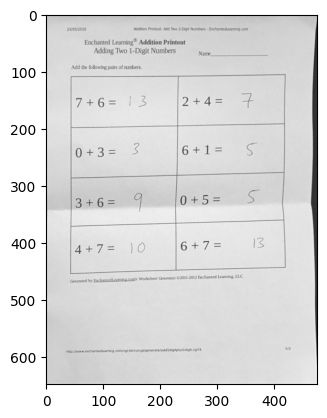

In [141]:
transformed_image = cv2.warpPerspective(img, M, (max_width, max_height), flags=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_GRAY2RGB))